Problem Statement No. 04

Consider the Bangalore House Price Data. Perform following operations.

a) Find and replace null values in the data using appropriate technique.

b) Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2

c) Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of
the range to be taken.

d) Calculate and add one more column as ‘Price_Per_Sqft’

e) Remove the outliers from Price_Per_Sqft and BHK Size column if any.

f) Apply the Linear Regression model to the data and display the training and testing performance measures as Mean
Squared Error and Accuracy

In [1]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv("house.csv")

In [5]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
missing_values = df.isnull().sum()
print(missing_values)

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64


#Replace null values using appropriate techniques

In [9]:
# For numerical columns, you can replace null values with the mean or median
df['bath'].fillna(df['bath'].median(),inplace=True)

In [21]:
#For categorical columns, replace null values with mode
#The [0] is used to access the first value of the mode result.
df['size'].fillna(df['size'].mode()[0],inplace=True)

In [16]:
missing_values_after = df.isnull().sum()
print("\nMissing values after replacement:")
print(missing_values_after)


Missing values after replacement:
location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64


#Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2

In [36]:
df['size'] = df['size'].str.extract('(\d+)')

# Convert the extracted numerical part to numeric data type
df['size'] = pd.to_numeric(df['size'])

# Display the DataFrame after transformation
print(df[['size']].head())

   size
0   2.0
1   4.0
2   3.0
3   3.0
4   2.0


#Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of the range to be taken.

In [38]:
def convert_to_numeric(sqft):
    if '-' in sqft:
        parts = sqft.split('-')
        return (float(parts[0]) + float(parts[1])) / 2
    elif sqft.isdigit():
        return float(sqft)
    else:
        return None

# Apply the function to 'total_sqft' column
df['total_sqft'] = df['total_sqft'].apply(convert_to_numeric)

# Display the DataFrame after transformation
print(df)

                       location  size  total_sqft  bath   price  \
0      Electronic City Phase II   2.0      1056.0   2.0   39.07   
1              Chikka Tirupathi   4.0      2600.0   5.0  120.00   
2                   Uttarahalli   3.0      1440.0   2.0   62.00   
3            Lingadheeranahalli   3.0      1521.0   3.0   95.00   
4                      Kothanur   2.0      1200.0   2.0   51.00   
...                         ...   ...         ...   ...     ...   
13315                Whitefield   5.0      3453.0   4.0  231.00   
13316             Richards Town   4.0      3600.0   5.0  400.00   
13317     Raja Rajeshwari Nagar   2.0      1141.0   2.0   60.00   
13318           Padmanabhanagar   4.0      4689.0   4.0  488.00   
13319              Doddathoguru   1.0       550.0   1.0   17.00   

       total_sqft_numeric  
0                  1056.0  
1                  2600.0  
2                  1440.0  
3                  1521.0  
4                  1200.0  
...                   ...  

# Calculate and add one more column as ‘Price_Per_Sqft’

In [40]:
df['Price_Per_Sqft'] = df['price'] / df['total_sqft']
df

,location,size,total_sqft,bath,price,total_sqft_numeric,Price_Per_Sqft
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,1056.0,0.036998
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,2600.0,0.046154
2,Uttarahalli,3.0,1440.0,2.0,62.00,1440.0,0.043056
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,1521.0,0.062459
4,Kothanur,2.0,1200.0,2.0,51.00,1200.0,0.042500
...,...,...,...,...,...,...,...
13315,Whitefield,5.0,3453.0,4.0,231.00,3453.0,0.066898
13316,Richards Town,4.0,3600.0,5.0,400.00,3600.0,0.111111
13317,Raja Rajeshwari Nagar,2.0,1141.0,2.0,60.00,1141.0,0.052585
13318,Padmanabhanagar,4.0,4689.0,4.0,488.00,4689.0,0.104073


# Remove the outliers from Price_Per_Sqft and BHK Size column if any.

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

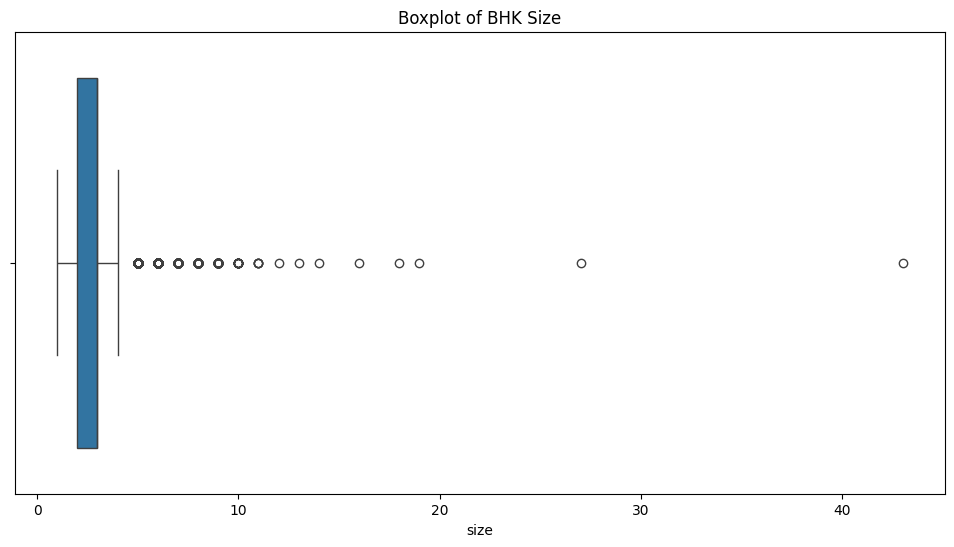

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='size', data=df)
plt.title('Boxplot of BHK Size')
plt.show()

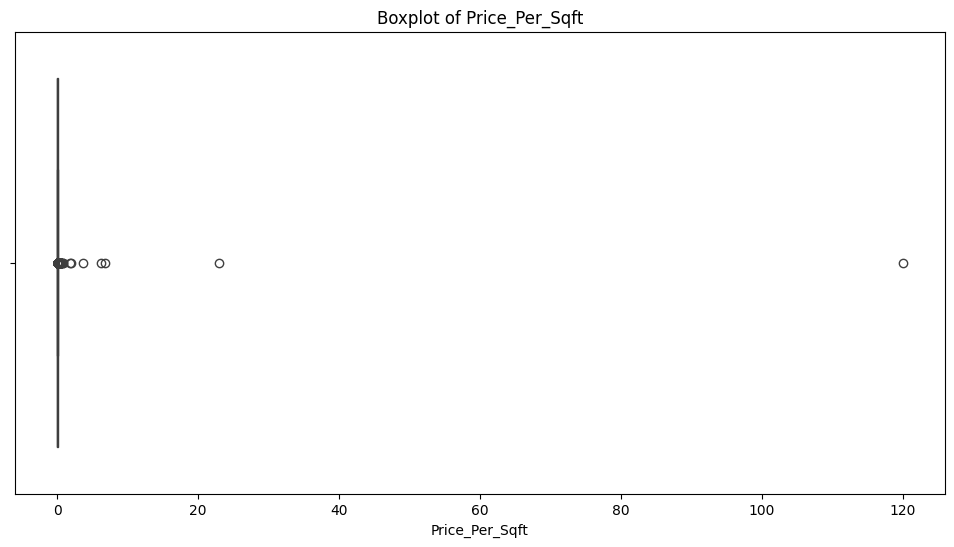

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Per_Sqft', data=df)
plt.title('Boxplot of Price_Per_Sqft')
plt.show()

In [59]:
# Handle outliers
# For 'BHK Size', we might remove values greater than a certain threshold (e.g., 10)
bhk_size_threshold = 4
df = df[df['size'] <= bhk_size_threshold]

# For 'Price_Per_Sqft', we might remove values greater than a certain threshold (e.g., 1000)
price_per_sqft_threshold = 0.1
df = df[df['Price_Per_Sqft'] <= price_per_sqft_threshold]

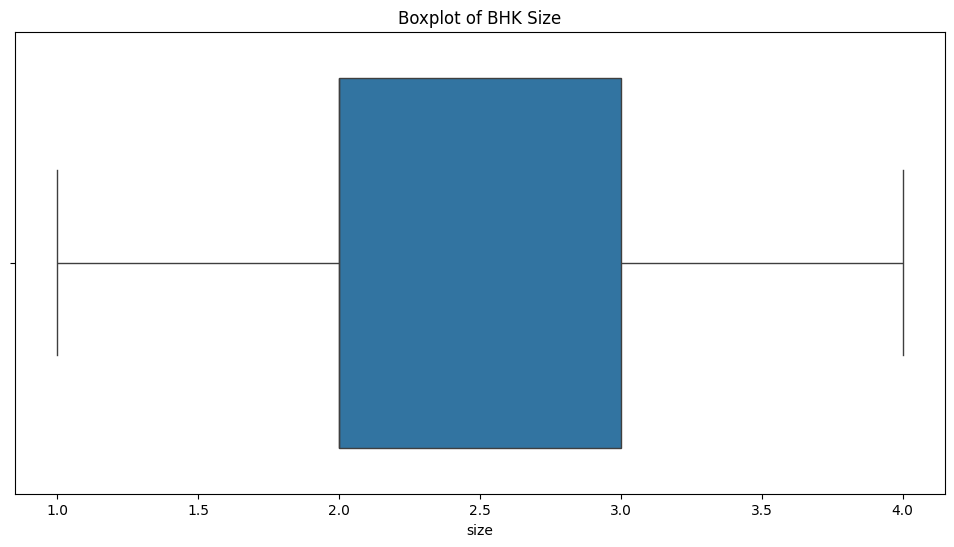

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='size', data=df)
plt.title('Boxplot of BHK Size')
plt.show()

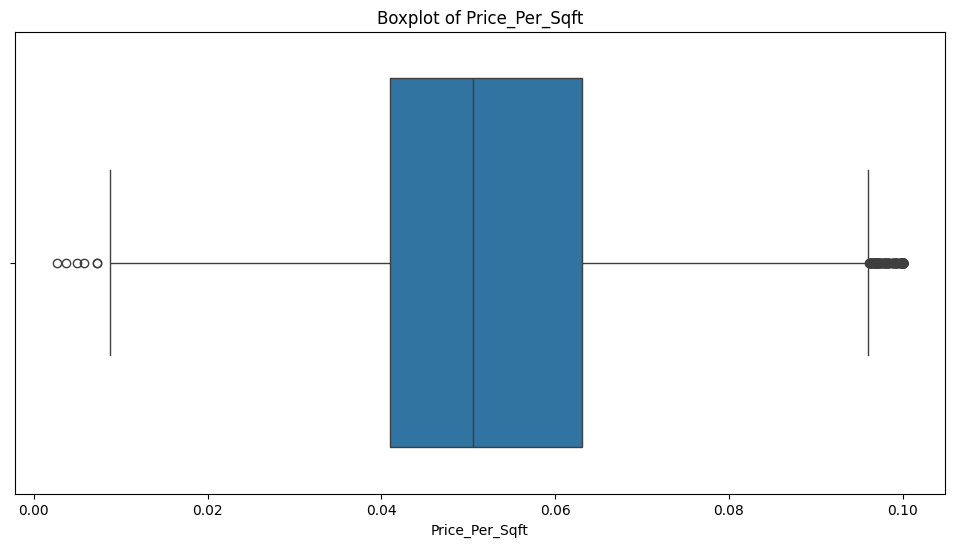

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Per_Sqft', data=df)
plt.title('Boxplot of Price_Per_Sqft')
plt.show()

# Apply the Linear Regression model to the data and display the training and testing performance measures as Mean Squared Error and Accuracy

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
# Define features (X) and target (y)
X = df[['total_sqft', 'size']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Display training and testing MSE
print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)

Training Mean Squared Error: 1728.2401694810812
Testing Mean Squared Error: 1238.2667674054128


# Accuracy is a classification metric and doesn't directly apply to regression problems like predicting house prices. So, we're calculating and displaying MSE instead.